# K_Nearest_Neighbors- Wine dataset 

#### Let's know about 'K- Nearest Neighbours'
K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. KNN algorithm used for both classification and regression problems.

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

#### How does the KNN algorithm work?
In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:

Calculate distance
Find closest neighbors
Vote for labels

#### Eager Vs. Lazy Learners
Eager learners mean when given training points will construct a generalized model before performing prediction on given new points to classify. You can think of such learners as being ready, active and eager to classify unobserved data points.

Lazy Learning means there is no need for learning or training of the model and all of the data points used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. Lazy learner stores merely the training dataset and waits until classification needs to perform. Only when it sees the test tuple does it perform generalization to classify the tuple based on its similarity to the stored training tuples. Unlike eager learning methods, lazy learners do less work in the training phase and more work in the testing phase to make a classification. Lazy learners are also known as instance-based learners because lazy learners store the training points or instances, and all learning is based on instances.

##### Curse of Dimensionality
KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.

To deal with the problem of the curse of dimensionality, you need to perform principal component analysis before applying any machine learning algorithm, or you can also use feature selection approach. Research has shown that in large dimension Euclidean distance is not useful anymore. Therefore, you can prefer other measures such as cosine similarity, which get decidedly less affected by high dimension.

##### How do you decide the number of neighbors in KNN?
Now, you understand the KNN algorithm working mechanism. At this point, the question arises that How to choose the optimal number of neighbors? And what are its effects on the classifier? The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.

Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements. In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.

Generally, Data scientists choose as an odd number if the number of classes is even. You can also check by generating the model on different values of k and check their performance. You can also try Elbow method here.

### Problem Statement:
Use the wine dataset, which is a very famous multi-class classification problem. This data is the result of a chemical analysis of wines grown in the same region in Italy using three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The dataset comprises 13 features ('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline') and a target (type of cultivars).

This data has three types of cultivar classes: 'class_0', 'class_1', and 'class_2'. Here, you can build a model to classify the type of cultivar. The dataset is available in the scikit-learn library

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [3]:
# print the names of the features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [4]:
# print the target names (labels)
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [5]:
# print the wine data (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [6]:
# print the wine labels (0:Class_0, 1:Class_1, 2:Class_3)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
# print data(feature)shape
print(wine.data.shape)

(178, 13)


In [8]:
# print target(or label)shape
print(wine.target.shape)

(178,)


### TRAIN TEST SPLIT

Let's split dataset by using function train_test_split().To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=0)

In [10]:
# Generating Model for K=5

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [11]:
#Model Evaluation for k=5
#Accuracy can be computed by comparing actual test set values and predicted values.

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222


Well, we got a classification rate of 72.22%, considered as good accuracy.
For further evaluation, we can also create a model for a different number of neighbors(k=7)

In [13]:
# Generating Model for K=7

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [14]:
#Model Evaluation for k=7
#Accuracy can be computed by comparing actual test set values and predicted values.

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


Well, we got a classification rate of 77.77%, considered as good accuracy.
Here, we have increased the number of neighbors in the model and accuracy got increased. But, this is not necessary for each case that an increase in many neighbors increases the accuracy

### Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value:



In [16]:
error_rate = []

# Will take some time

for i in range(1, 40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

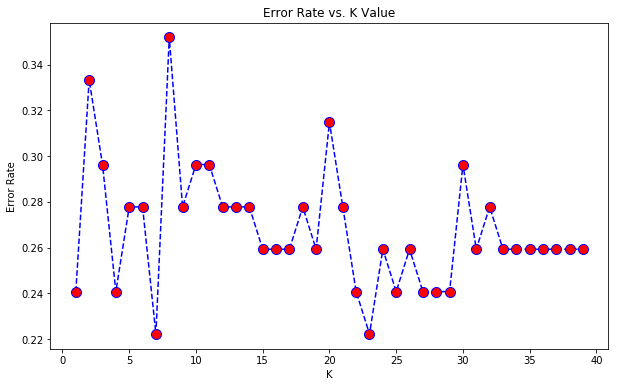

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around few values.
Let's retrain the model with that and check the classification report!

In [18]:
# Generating Model for K=23

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=23)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [19]:
#Model Evaluation for k=23
#Accuracy can be computed by comparing actual test set values and predicted values.

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


We can observe that k=7 and 23 , both yield the same accuracy as per the graph.
Hence k=7 /23 is the optimum k needed for this dataset .